In [28]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from dmba import classificationSummary, regressionSummary
from sklearn import tree

To understand rules better, watch https://www.youtube.com/watch?v=PNF2eUiZAn0

In [29]:
eb = pd.read_csv('eBayAuctions.csv')

In [30]:
ebRev = eb.copy()

In [31]:
eb.sample(5)

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
1040,Home/Garden,EUR,91,10,Tue,59.52,1.23,1
906,Toys/Hobbies,EUR,638,10,Wed,39.97,1.23,1
477,Music/Movie/Game,GBP,105,7,Thu,5.16,4.45,1
925,Clothing/Accessories,EUR,2038,5,Tue,22.15,2.45,1
1730,Home/Garden,US,4398,3,Sun,24.99,24.99,0


In [32]:
eb['Category'].unique()

array(['Music/Movie/Game', 'Automotive', 'SportingGoods', 'Home/Garden',
       'Books', 'Collectibles', 'Business/Industrial', 'Toys/Hobbies',
       'Electronics', 'Computer', 'EverythingElse',
       'Clothing/Accessories', 'Coins/Stamps', 'Antique/Art/Craft',
       'Jewelry', 'Pottery/Glass', 'Health/Beauty', 'Photography'],
      dtype=object)

In [33]:
eb.currency.unique()

array(['US', 'GBP', 'EUR'], dtype=object)

In [34]:
eb.shape

(1972, 8)

In [35]:
eb.isnull().sum()

Category        0
currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

In [36]:
eb.dtypes

Category         object
currency         object
sellerRating      int64
Duration          int64
endDay           object
ClosePrice      float64
OpenPrice       float64
Competitive?      int64
dtype: object

In [37]:
eb['Duration'].unique()

array([ 5,  7,  1,  3, 10], dtype=int64)

In [38]:
eb['Duration'] = eb['Duration'].astype('category')

In [39]:
eb.dtypes

Category          object
currency          object
sellerRating       int64
Duration        category
endDay            object
ClosePrice       float64
OpenPrice        float64
Competitive?       int64
dtype: object

In [40]:
eb = pd.get_dummies(eb)

In [41]:
eb.head()

,sellerRating,ClosePrice,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,...,Duration_5,Duration_7,Duration_10,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
0,3249,0.01,0.01,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


[Text(349.26286764705884, 509.625, 'OpenPrice <= 3.615\ngini = 0.498\nsamples = 1183\nvalue = [553, 630]'),
 Text(209.25, 441.675, 'ClosePrice <= 3.645\ngini = 0.395\nsamples = 547\nvalue = [148, 399]'),
 Text(123.08823529411765, 373.725, 'OpenPrice <= 0.94\ngini = 0.453\nsamples = 222\nvalue = [145, 77]'),
 Text(98.47058823529412, 305.775, 'gini = 0.386\nsamples = 46\nvalue = [12, 34]'),
 Text(147.70588235294116, 305.775, 'OpenPrice <= 2.445\ngini = 0.369\nsamples = 176\nvalue = [133, 43]'),
 Text(98.47058823529412, 237.825, 'ClosePrice <= 2.235\ngini = 0.452\nsamples = 110\nvalue = [72, 38]'),
 Text(73.85294117647058, 169.875, 'ClosePrice <= 1.24\ngini = 0.285\nsamples = 87\nvalue = [72, 15]'),
 Text(49.23529411764706, 101.92500000000001, 'Duration_3 <= 0.5\ngini = 0.165\nsamples = 55\nvalue = [50, 5]'),
 Text(24.61764705882353, 33.97500000000002, 'gini = 0.111\nsamples = 51\nvalue = [48, 3]'),
 Text(73.85294117647058, 33.97500000000002, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 T

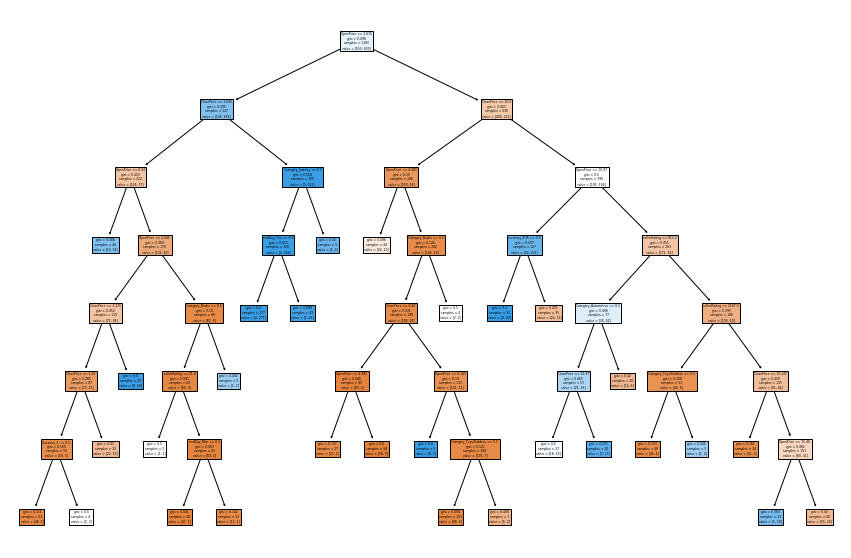

In [42]:
X = eb.drop(columns = ['Competitive?'])
y = eb['Competitive?']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

fullClassTree = tree.DecisionTreeClassifier(min_samples_split = 50, max_depth = 7, random_state = 1)

clf = fullClassTree.fit(train_X, train_y)

plt.figure(figsize = (15, 10))
tree.plot_tree(clf, feature_names = train_X.columns, filled = True)

In [43]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8808)

       Prediction
Actual   0   1
     0 510  43
     1  98 532
Confusion Matrix (Accuracy 0.8428)

       Prediction
Actual   0   1
     0 320  33
     1  91 345


Write down the results in terms of rules.

The good variables to choose are: Seller Rating and Open Price and Category. Close Price is subjected to data leakage cos it can only be determined after the auction has ended; same with duration and end day. Currency variable doesn't count much since it's not among the top predictors in the full tree.

Describe the interesting and uninteresting information that these rules provide. 

This model does not seem practical for predicting the outcome of a new auction because it overfits and it's subject to data leakage

In [44]:
ebRev.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [45]:
ebRev.drop(['endDay','ClosePrice', 'Duration','currency'], axis = 1,  inplace =True)

In [46]:
ebRev = pd.get_dummies(ebRev)

In [47]:
ebRev.head()

,sellerRating,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,...,Category_Electronics,Category_EverythingElse,Category_Health/Beauty,Category_Home/Garden,Category_Jewelry,Category_Music/Movie/Game,Category_Photography,Category_Pottery/Glass,Category_SportingGoods,Category_Toys/Hobbies
0,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
ebRev.columns

Index(['sellerRating', 'OpenPrice', 'Competitive?',
       'Category_Antique/Art/Craft', 'Category_Automotive', 'Category_Books',
       'Category_Business/Industrial', 'Category_Clothing/Accessories',
       'Category_Coins/Stamps', 'Category_Collectibles', 'Category_Computer',
       'Category_Electronics', 'Category_EverythingElse',
       'Category_Health/Beauty', 'Category_Home/Garden', 'Category_Jewelry',
       'Category_Music/Movie/Game', 'Category_Photography',
       'Category_Pottery/Glass', 'Category_SportingGoods',
       'Category_Toys/Hobbies'],
      dtype='object')

In [49]:
ebRev.shape

(1972, 21)

In [50]:
predictors = ['sellerRating', 'OpenPrice', 'Category_Antique/Art/Craft', 'Category_Automotive', 'Category_Books',
       'Category_Business/Industrial', 'Category_Clothing/Accessories',
       'Category_Coins/Stamps', 'Category_Collectibles', 'Category_Computer',
       'Category_Electronics', 'Category_EverythingElse',
       'Category_Health/Beauty', 'Category_Home/Garden', 'Category_Jewelry',
       'Category_Music/Movie/Game', 'Category_Photography',
       'Category_Pottery/Glass', 'Category_SportingGoods',
       'Category_Toys/Hobbies']
outcome = ['Competitive?']

[Text(736.1116071428571, 1019.25, 'OpenPrice <= 3.615\ngini = 0.498\nsamples = 1183\nvalue = [553, 630]'),
 Text(338.7857142857143, 883.35, 'OpenPrice <= 1.035\ngini = 0.395\nsamples = 547\nvalue = [148, 399]'),
 Text(199.28571428571428, 747.45, 'Category_SportingGoods <= 0.5\ngini = 0.219\nsamples = 184\nvalue = [23, 161]'),
 Text(159.42857142857142, 611.55, 'OpenPrice <= 0.65\ngini = 0.271\nsamples = 142\nvalue = [23, 119]'),
 Text(119.57142857142856, 475.65, 'Category_Automotive <= 0.5\ngini = 0.201\nsamples = 97\nvalue = [11, 86]'),
 Text(79.71428571428571, 339.75, 'sellerRating <= 3120.0\ngini = 0.175\nsamples = 93\nvalue = [9, 84]'),
 Text(39.857142857142854, 203.85000000000002, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(119.57142857142856, 203.85000000000002, 'Category_Music/Movie/Game <= 0.5\ngini = 0.204\nsamples = 78\nvalue = [9, 69]'),
 Text(79.71428571428571, 67.95000000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(159.42857142857142, 67.95000000000005,

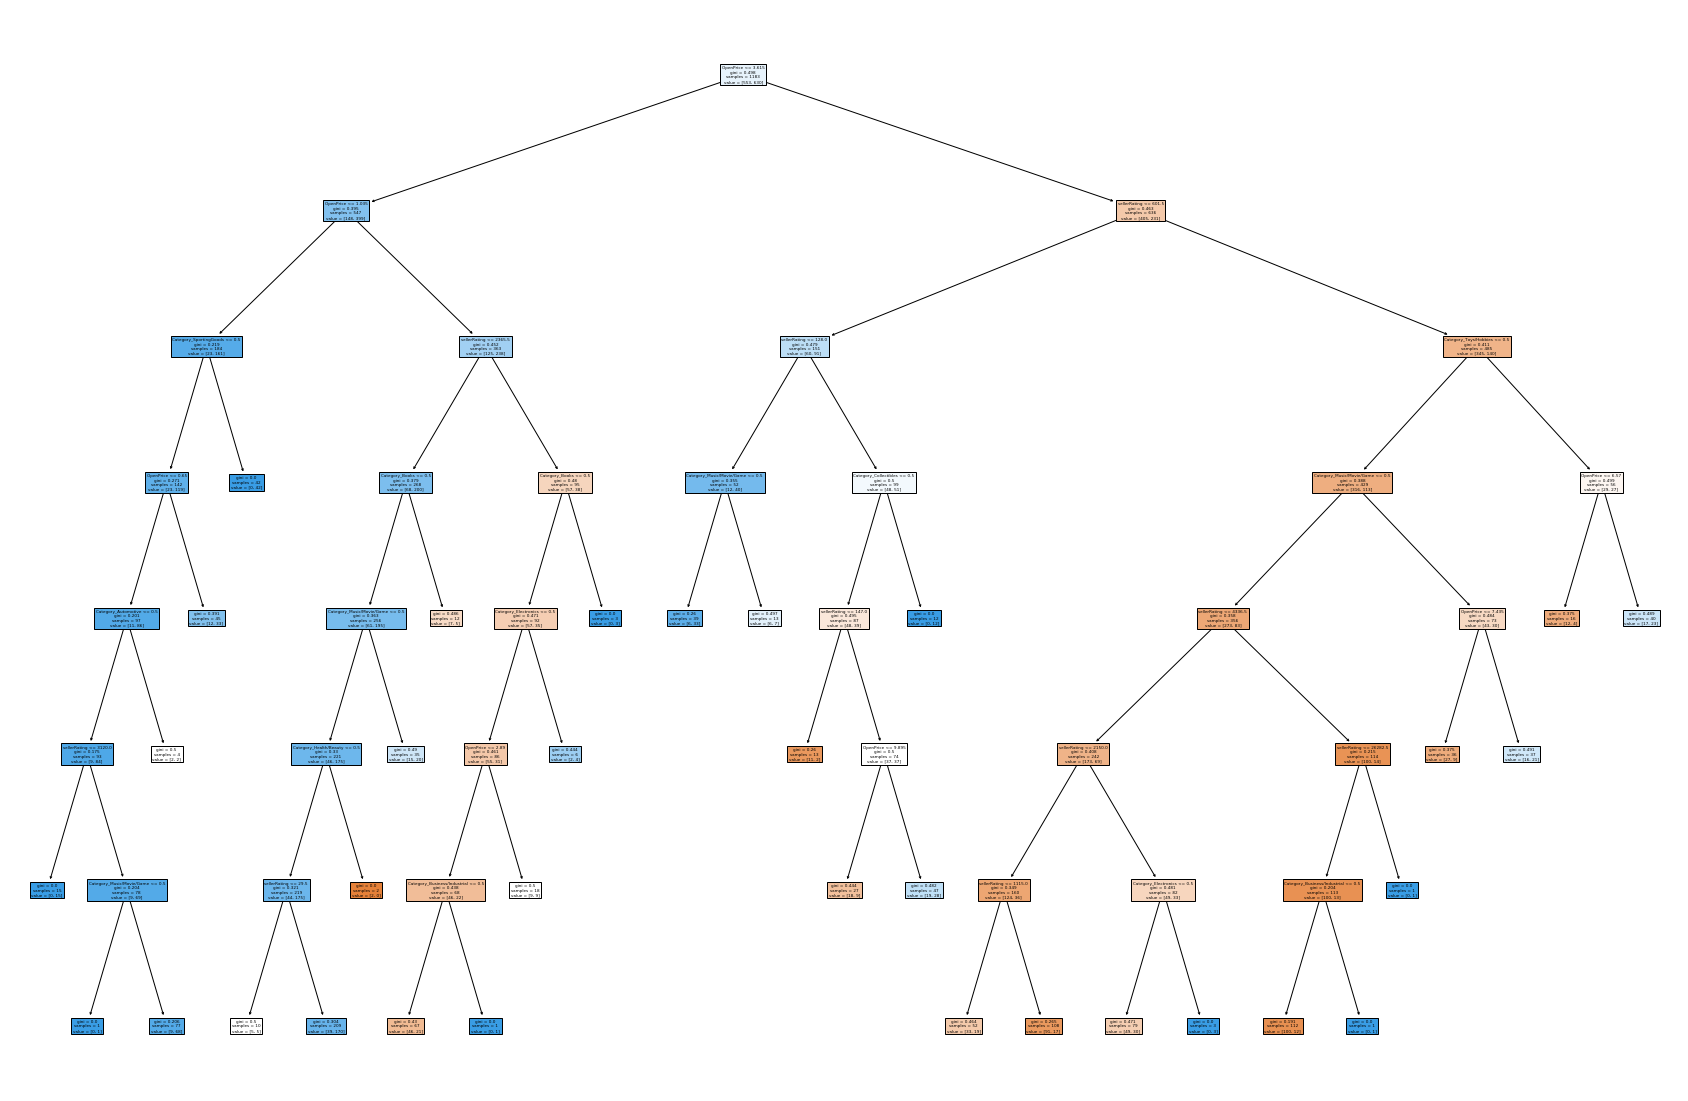

In [51]:
X = ebRev[predictors]
y = ebRev[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

smallClassTree = tree.DecisionTreeClassifier(min_samples_split = 50, max_depth = 7, random_state = 1)

clf = smallClassTree.fit(train_X, train_y)

plt.figure(figsize = (30, 20))
tree.plot_tree(clf, feature_names = train_X.columns, filled = True)

Describe the resulting tree in terms of rules. Make sure to report the smallest set of rules required for classification

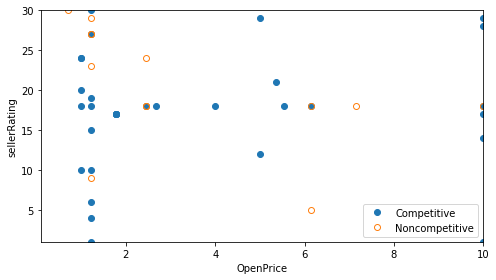

In [52]:
def basePlot(ax):
    ebRev.loc[ebRev['Competitive?'] == 1].plot(x= 'OpenPrice', y='sellerRating', style='o', markerfacecolor = 'C0', markeredgecolor = 'C0',
                                                                                         ax=ax)
    ebRev.loc[ebRev['Competitive?'] == 0].plot(x='OpenPrice', y='sellerRating', style='o', markerfacecolor = 'none', markeredgecolor = 'C1',
                                                                                         ax=ax)
    ax.legend(['Competitive', 'Noncompetitive']);
    ax.set_xlim(0.10, 10)
    ax.set_ylim(1, 30)
    ax.set_xlabel('OpenPrice')
    ax.set_ylabel('sellerRating')
    return ax

fig, ax = plt.subplots(figsize = (7, 4))

ax = basePlot(ax)
plt.tight_layout()
plt.show()

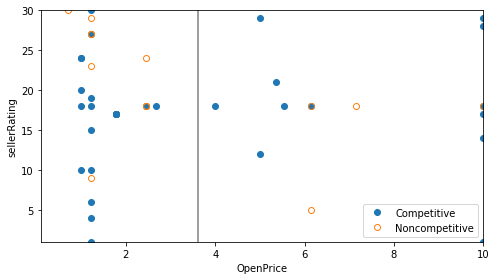

In [53]:
fig, ax = plt.subplots(figsize = (7, 4))

ax = basePlot(ax)
x0 = 3.615
ax.plot((x0, x0), (50,1), color = 'grey')
plt.tight_layout()
plt.show()

This splitting for the first value (3.615) does not seem reasonable with respect to the meaning of the two predictors

In [54]:
#Confusion matrix
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))


Confusion Matrix (Accuracy 0.7591)

       Prediction
Actual   0   1
     0 412 141
     1 144 486
Confusion Matrix (Accuracy 0.7186)

       Prediction
Actual   0   1
     0 249 104
     1 118 318


Chances of obtaining at least two bids signifies that an auction is competitive. In other words, what is percentage of predicting a competitive auction? So, precision calcuation is what is required. Precision = TP/TP + FP. Precision = 318/318+118 = 0.729. The model is 72.9% accurate for predicting competitive auctions based on the selected variables: sellerRating and OpenPrice. This performs better than the auction settings set by the seller. I would recommend a seller have a high rating and a relatively low open price.